In [128]:
import os
import numpy as np
import matplotlib.pyplot as plt
import eazy
from glob import glob
print('EAZYCODE = ' + os.getenv('EAZYCODE'))

EAZYCODE = /Users/Vince.ec/python_git_downloads/eazy-py/eazy-photoz/


In [2]:
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all = 'ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [165]:
params={}

params['VERBOSITY']                 =1.0
params['FILTERS_RES']               =os.getenv('EAZYCODE') + 'filters/FILTER.RES.latest'
params['FILTER_FORMAT']             =1.0
params['SMOOTH_FILTERS']            ='n'
params['SMOOTH_SIGMA']              =100.0
params['TEMPLATES_FILE']            =os.getenv('EAZYCODE') + 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
params['TEMPLATE_COMBOS']           ='a'
params['NMF_TOLERANCE']             =0.0001
params['WAVELENGTH_FILE']           =os.getenv('EAZYCODE') + 'templates/uvista_nmf/lambda.def'
params['TEMP_ERR_FILE']             =os.getenv('EAZYCODE') + 'templates/uvista_nmf/template_error_10.def'
params['TEMP_ERR_A2']               =0.5
params['SYS_ERR']                   =0.02
params['APPLY_IGM']                 ='y'
params['SCALE_2175_BUMP']           =0.0
params['MW_EBV']                    =0.0103
params['CAT_HAS_EXTCORR']           ='y'
params['DUMP_TEMPLATE_CACHE']       ='n'
params['USE_TEMPLATE_CACHE']        ='n'
params['CACHE_FILE']                ='photz.tempfilt'
params['CATALOG_FILE']              ='/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat'
params['MAGNITUDES']                ='n'
params['NOT_OBS_THRESHOLD']         =-90.0
params['N_MIN_COLORS']              =5.0
params['OUTPUT_DIRECTORY']          ='/Volumes/Vince_CLEAR/eazy_test/'
params['MAIN_OUTPUT_FILE']          ='/Volumes/Vince_CLEAR/eazy_test/goodsn_3dhst.v4.4'
params['PRINT_ERRORS']              ='y'
params['CHI2_SCALE']                =1.0
params['VERBOSE_LOG']               ='y'
params['OBS_SED_FILE']              ='n'
params['TEMP_SED_FILE']             ='n'
params['POFZ_FILE']                 ='n'
params['BINARY_OUTPUT']             ='y'
params['APPLY_PRIOR']               ='y'
params['PRIOR_FILE']                =os.getenv('EAZYCODE') + 'templates/prior_F160W_TAO.dat'
params['PRIOR_FILTER']              =205
params['PRIOR_ABZP']                =25.0
params['PRIOR_FLOOR']               =0.01
params['FIX_ZSPEC']                 =False
params['Z_MIN']                     =0.01
params['Z_MAX']                     =6.0
params['Z_STEP']                    =0.01
params['Z_STEP_TYPE']               =1.0
params['GET_ZP_OFFSETS']            ='n'
params['ZP_OFFSET_TOL']             =0.0001
params['REST_FILTERS']              ='---'
params['RF_PADDING']                =1000.0
params['RF_ERRORS']                 ='n'
params['Z_COLUMN']                  ='z_peak'
params['USE_ZSPEC_FOR_REST']        ='y'
params['READ_ZBIN']                 ='n'
params['H0']                        =70.0
params['OMEGA_M']                   =0.3
params['OMEGA_L']                   =0.7

In [53]:
translate_file = '/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Eazy/goodsn_3dhst.v4.4.zphot.translate'
zero_point = '/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Eazy/goodsn_3dhst.v4.4.zphot.zeropoint'

In [24]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd

r4 = Table.read(fits.open('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Eazy/goodss_3dhst.v4.4.zout.fits'),
                format = 'fits').to_pandas()
v4 = Table.read(fits.open('/Volumes/Vince_CLEAR/eazy_test/gstest.zout.fits'),
                format = 'fits').to_pandas()

# r4 = Table.read(fits.open('/Volumes/Vince_CLEAR/eazy_test/gstest2.zout.fits'),
#                 format = 'fits').to_pandas()

In [25]:
v4 = v4.query('id < 500000')

In [42]:
diff = np.round(r4.z_phot.values-v4.z_phot.values,3)

(array([1.000e+00, 0.000e+00, 1.000e+01, 1.500e+01, 4.300e+01, 9.117e+03,
        8.000e+00, 1.000e+00, 1.000e+00, 5.000e+00]),
 array([-5.629 , -4.5833, -3.5376, -2.4919, -1.4462, -0.4005,  0.6452,
         1.6909,  2.7366,  3.7823,  4.828 ]),
 <a list of 10 Patch objects>)

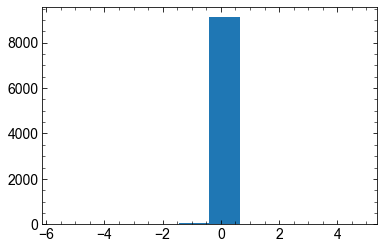

In [50]:
plt.hist(diff[diff**2 > 0])

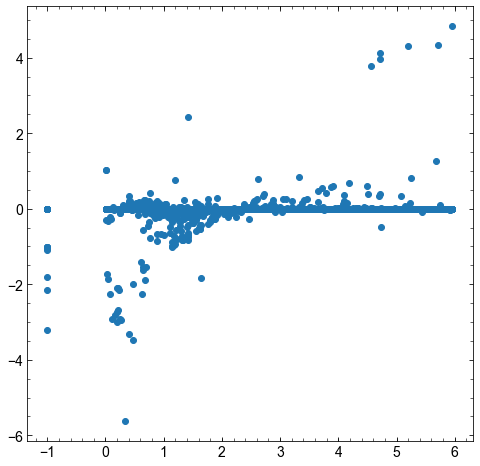

In [44]:
plt.figure(figsize=[8,8])
plt.scatter(r4.z_phot,diff)

Read default param file: /Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Catalog/goodsn_3dhst.v4.4.cat
f_F160W e_F160W (205): hst/wfc3/IR/f160w.dat
f_U e_U (227): NOAO/k1001bp_jul04.txt
f_F435W e_F435W (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f_G e_G (229): LRIS/g_blue_transmission.dat
f_F606W e_F606W (236): hst/ACS_update_sep07/wfc_f606w_t81.dat
f_Rs e_Rs (231): LRIS/Rs_LRISred_transmission.dat
f_F775W e_F775W (238): hst/ACS_update_sep07/wfc_f775w_t81.dat
f_F850LP e_F850LP (240): hst/ACS_update_sep07/wfc_f850lp_t81.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_J e_J (224): MOIRCS/J277.txt
f_F140W e_F140W (204): hst/wfc3/IR/f140w.dat
f_H e_H (225): MOIRCS/H117.txt
f_Ks e_Ks (226): MOIRCS/Ks_rot1707wedged120K.txt
f_IRAC1 e_IRAC1 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_IRAC2 e_IRAC2 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC3 e_IRAC3 ( 20): IRAC/irac_tr3_

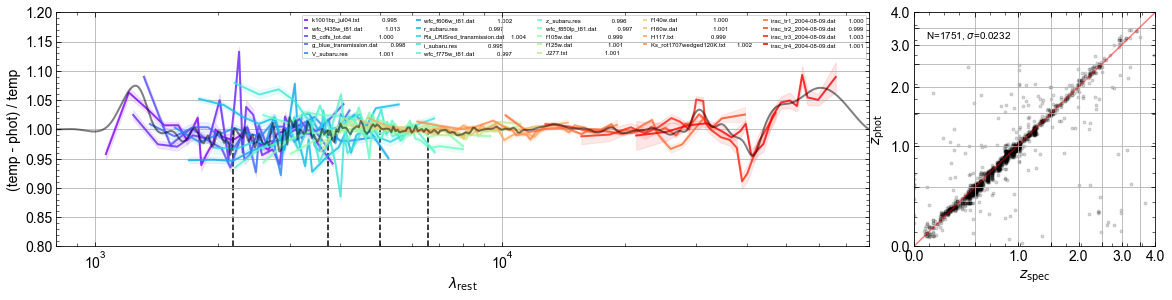

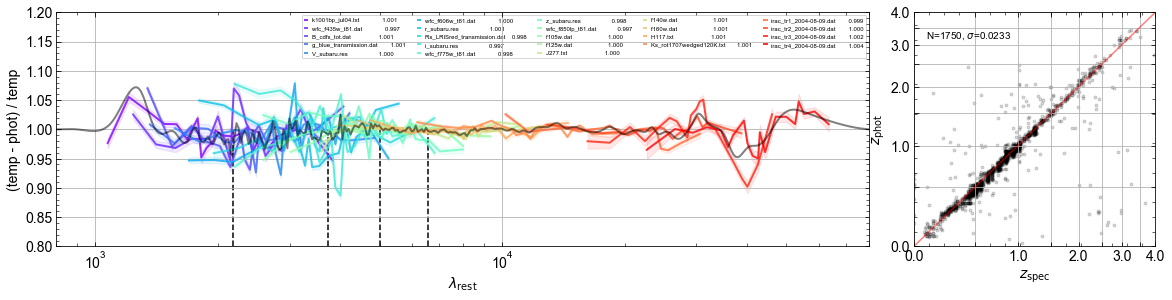

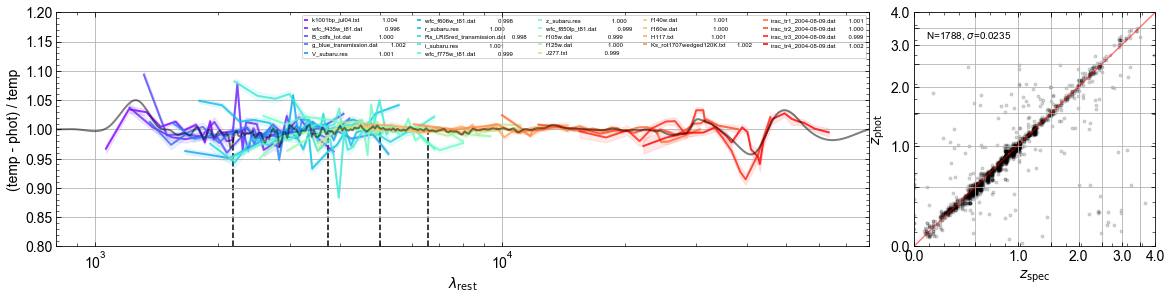

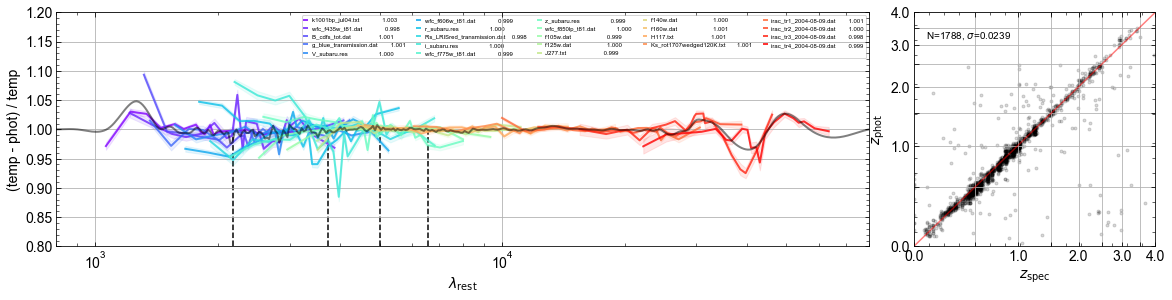

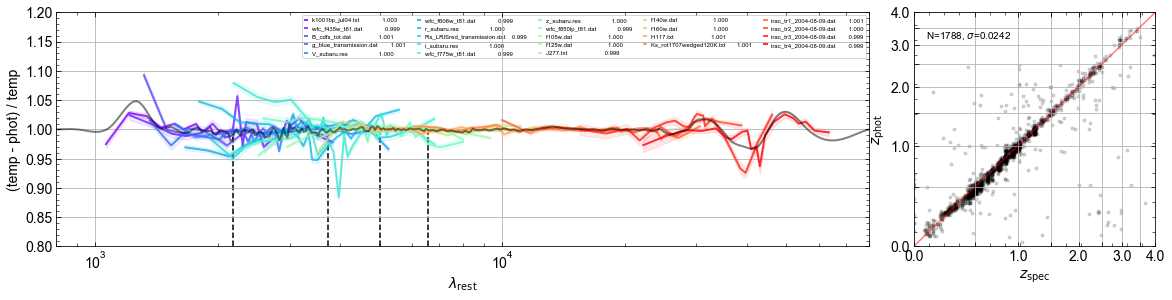

In [166]:
#translate_file = '/Users/rsimons/Desktop/clear/Catalogs/%s_3dhst_temp.v4.1.translate'%field
# translate_file = '/Users/rsimons/Desktop/clear/Catalogs/%s_v4.3.translate'%field

#translate_file = '/Users/rsimons/Desktop/clear/Catalogs/%s_3dhst.v4.1.cats/Eazy/%s_3dhst.v4.1.translate'%(field, field)
translate_file = '/Volumes/Vince_CLEAR/3dhst_V4.4/goodsn_3dhst.v4.4.cats/Eazy/goodsn_3dhst.v4.4.zphot.translate'

os.chdir(os.getenv('EAZYCODE'))

self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)
#self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
#                          params=params, load_prior=True, load_products=False)
NITER = 5
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    sn = self.fnu/self.efnu
    clip = (sn > 20).sum(axis=1) > 10 # Generally make this higher to ensure reasonable fits
    print(len(np.where(clip == True)[0]))
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=(iter > 0), 
                              NBIN=NBIN, get_spatial_offset=False)
    
os.chdir('/Users/Vince.ec/GitHub/Cluster_and_field/scripts/')

Compute best fits
Fit 718.6 s (n_proc=8, NOBJ=50507)


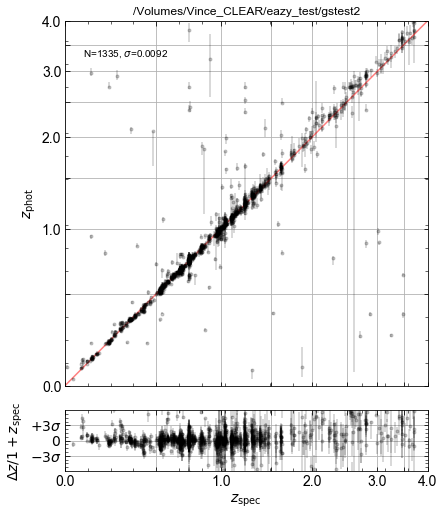

In [30]:

# Turn off error corrections derived above
self.efnu = self.efnu_orig*1

# Full catalog
sample = np.isfinite(self.cat['z_spec'])
self.fit_parallel(self.idx[sample], n_proc=8)
# Show zspec-zphot comparison
fig = self.zphot_zspec()


In [31]:
zout, hdu = self.standard_output(rf_pad_width=0.5, rf_max_err=2, prior=True, beta_prior=True)


Get best fit coeffs & best redshifts
Get parameters (UBVJ=[153, 154, 155, 161], LIR=[8, 1000])
Rest-frame filters: [153, 154, 155, 161]


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/eazy/photoz.py:2280: RuntimeWarning: covariance is not positive-semidefinite.
  coeffs_draw[:, ok_temp] = np.random.multivariate_normal(coeffs_i[ok_temp], covar, size=get_err)


Rest-frame filters: [270, 274, 120, 121, 156, 157, 158, 159, 160, 161, 162, 163]


In [60]:
self.show_fit(self.cat['id'][21555], xlim=[0.2, 3], show_components=True)

AttributeError: 'PhotoZ' object has no attribute 'zbest'

<ErrorbarContainer object of 3 artists>

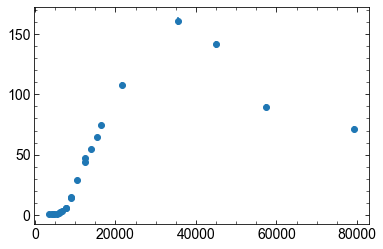

In [67]:
plt.errorbar(self.lc, self.fnu[21155],self.efnu[21155], fmt='o')

In [179]:
fnu_i = np.squeeze(self.fnu[21155, :])*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu[21155,:])*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr


In [79]:
from spec_exam import Gen_spec

In [172]:
Gs = Gen_spec('GND', 21156, 1.253,
               g102_lims=[8300, 11500], g141_lims=[11100, 16500], mdl_err = True,
            phot_errterm = 0.03, decontam = True) 

cleaned


<ErrorbarContainer object of 3 artists>

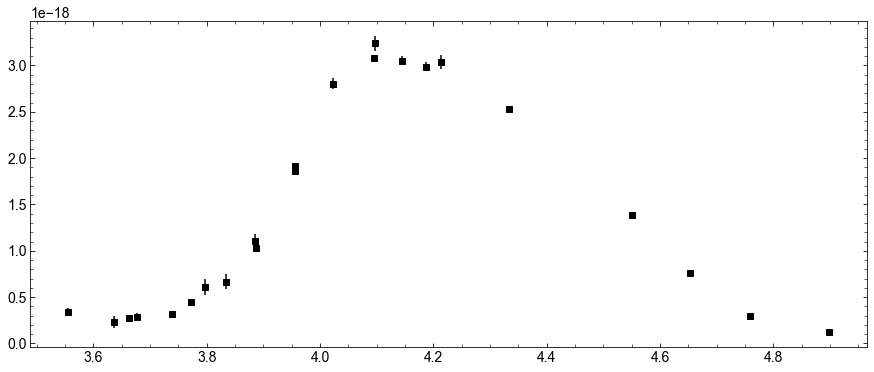

In [181]:
plt.figure(figsize = [15,6])

plt.errorbar(np.log10(self.lc), (fnu_i*fnu_factor*flam_sed), (efnu_i*fnu_factor*flam_sed), color='k', marker='s', 
             linestyle='None', label=None, zorder=10)
# plt.errorbar(np.log10(pwv)[pfl > 0], pfl[pfl > 0], per[pfl > 0], color='r', marker='s', 
#              linestyle='None', label=None, zorder=10)
# plt.errorbar(np.log10(Gs.Pwv)[Gs.Pflx > 0],Gs.Pflx[Gs.Pflx > 0],Gs.Perr[Gs.Pflx > 0],
#                                  linestyle='None', marker='p', color='#984ea3')

In [99]:
self.f_numbers

array([205, 227, 233, 229, 236, 231, 238, 240, 203, 224, 204, 225, 226,
        18,  19,  20,  21,  46, 115, 116, 117, 118, 202])

In [100]:
Gs.Pnum

array([205., 227., 233.,  46., 229., 115., 236., 116., 231., 117., 238.,
       118., 240., 203., 224., 204., 225., 226.,  18.,  19.,  20.,  21.,
       202.])

In [175]:
fnu_i = np.squeeze(self.fnu)*self.ext_redden*self.zp
efnu_i = np.squeeze(self.efnu)*self.ext_redden*self.zp

fnu_factor = 10**(-0.4*(self.param['PRIOR_ABZP']+48.6))
flam_sed = 3.e18/self.lc**2/self.ext_corr

nwv=self.lc
nfl=fnu_i*fnu_factor*flam_sed
ner=efnu_i*fnu_factor*flam_sed

In [176]:
def extract_phot(catalog, idx):

    Pwv = []
    Pfl = []
    Per = []
    Pnum = []
    
    for ii in range(len(catalog.f_numbers)):
        Pwv.append(nwv[ii])
        Pfl.append(nfl[idx - 1][ii])            
        Per.append(ner[idx - 1][ii])            
        Pnum.append(catalog.f_numbers[ii])
                
    return np.array([Pwv,Pfl,Per,Pnum])

In [177]:
pwv,pfl,per,pnum = extract_phot(self, 21156)

In [126]:
pnum, Gs.Pnum

(array([205., 227., 233.,  46., 229., 115., 236., 116., 231., 117., 238.,
        118., 240., 203., 224., 204., 225., 226.,  18.,  19.,  20.,  21.,
        202.]),
 array([205., 227., 233.,  46., 229., 115., 236., 116., 231., 117., 238.,
        118., 240., 203., 224., 204., 225., 226.,  18.,  19.,  20.,  21.,
        202.]))

In [129]:
flist = glob('../data/bestfits/*Bfit.npy')

field = [os.path.basename(U).split('_')[0] for U in flist]
galaxy = np.array([os.path.basename(U).split('_')[1] for U in flist]).astype(np.int)

In [170]:
for i in range(len(field)):
    if field[i][1] == 'N':
        pwv,pfl,per,pnum = extract_phot(self, galaxy[i])
        np.save('../phot/GND_{0}_phot.npy'.format(galaxy[i]), [pwv,pfl,per,pnum])